In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import itertools
import statsmodels.api as sm
import datetime
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\pawan\\Downloads\\Python\\ProjectonTimeSeriesAnalysis\\Dataset'

In [3]:
data= pd.read_csv('Super_Store.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
data.shape

(2121, 21)

### EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [8]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
data['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Sales'>

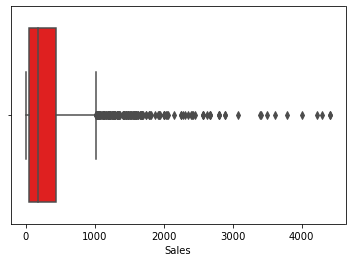

In [10]:
sns.boxplot(x= data['Sales'], color ='r')


From the boxplot the mean sale is around 349.834887 as shown from the data.describe() above. The are quite a number of extreme points above the whiskers indicating these are the ouliers present in the sale feature. We will decide how to handle these outliers in the data preprocessing stage

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

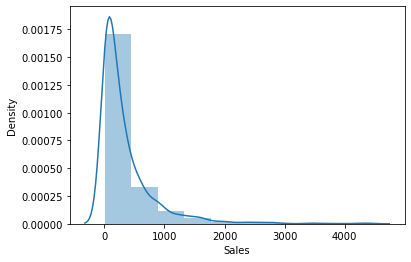

In [11]:
#Distribution of the Continuous Variables
sns.distplot(data['Sales'], bins=10)


#### Ordinal and Categorical Data

#### Univariate Analysis

In [12]:
data["Ship Mode"].value_counts()

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Orders')

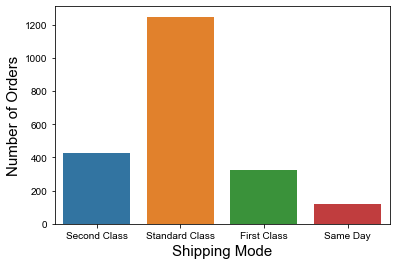

In [13]:

sns.countplot(x='Ship Mode', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Shipping Mode", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [14]:
data["Segment"].value_counts()

Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Orders')

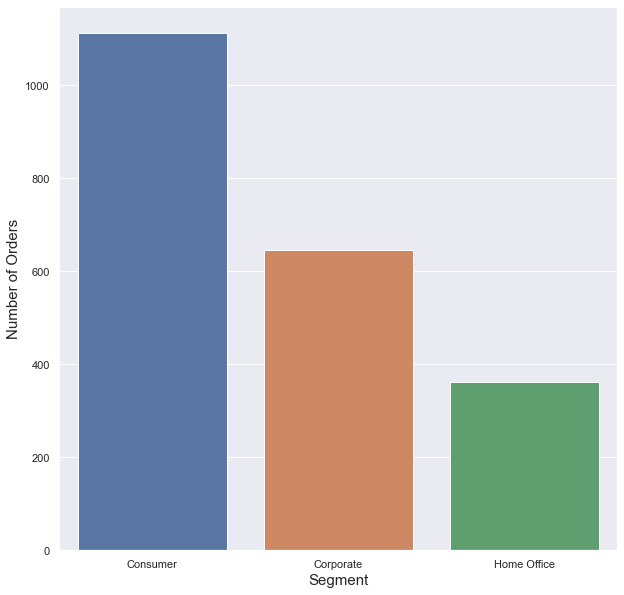

In [15]:

sns.countplot(x='Segment', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Segment", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [16]:
data["Country"].value_counts()
# All the orders were from US

United States    2121
Name: Country, dtype: int64

In [17]:
data["City"].value_counts().head(5)
# Top 5 cities based on number of orders

New York City    192
Los Angeles      154
Philadelphia     111
San Francisco    102
Seattle           97
Name: City, dtype: int64

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Orders')

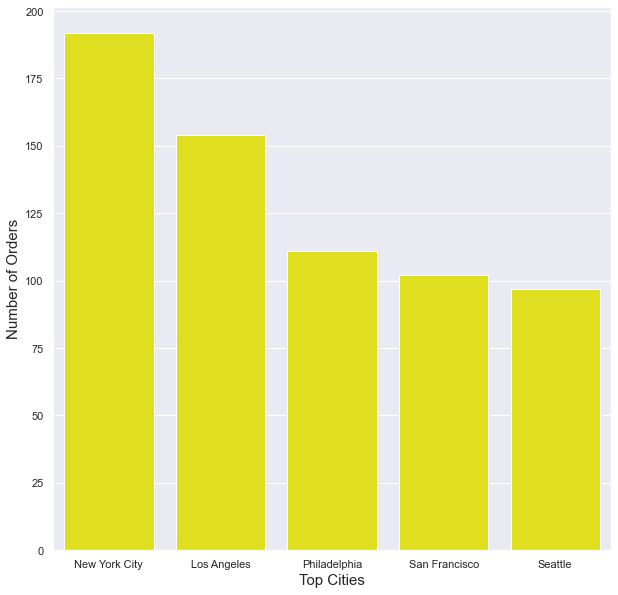

In [18]:
sns.barplot(data["City"].value_counts().head(5).index, data["City"].value_counts().head(5).values, color = "yellow")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Top Cities", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [19]:
data["State"].value_counts().head(6)

California      444
New York        236
Texas           202
Pennsylvania    125
Illinois        123
Washington      114
Name: State, dtype: int64

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Orders')

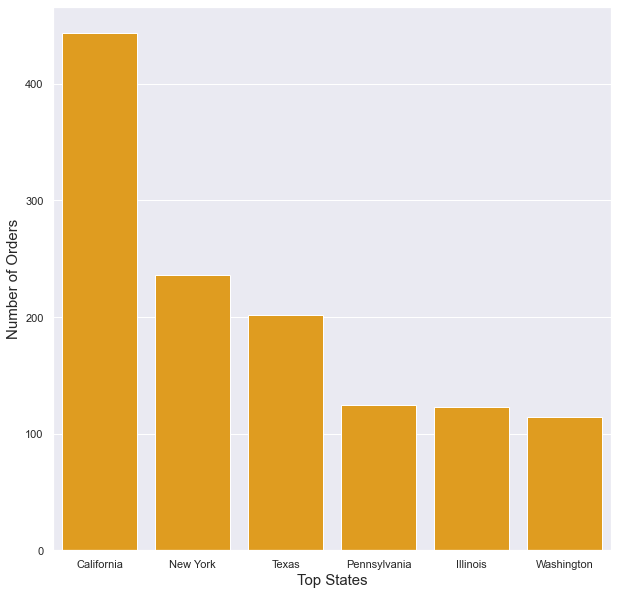

In [20]:
sns.barplot(data["State"].value_counts().head(6).index, data["State"].value_counts().head(6).values, color = "orange")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Top States", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)


In [21]:
data["Region"].value_counts()

West       707
East       601
Central    481
South      332
Name: Region, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Orders')

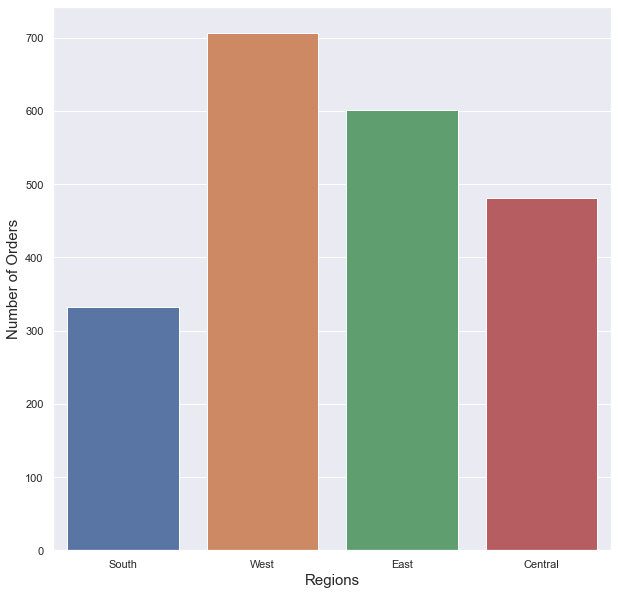

In [22]:
sns.countplot(x='Region', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)


In [23]:
data['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [24]:
data['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Sub-Category')

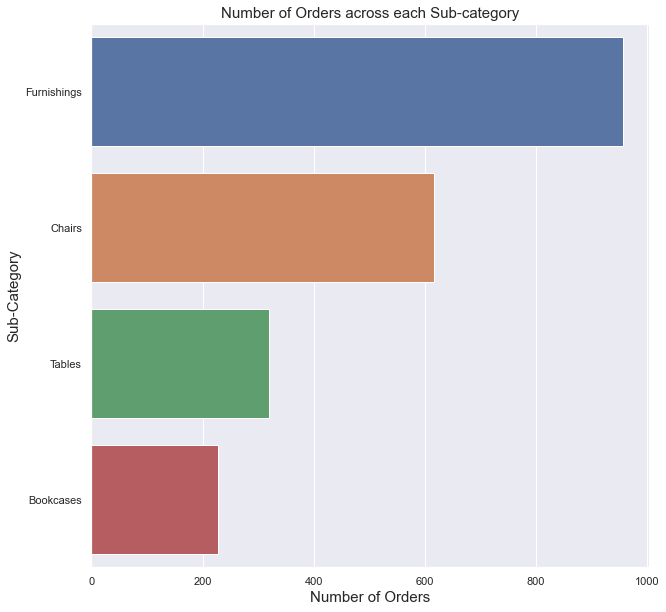

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y="Sub-Category", data=data,order=data["Sub-Category"].value_counts().index)
plt.title("Number of Orders across each Sub-category", fontsize = 15)
plt.xlabel("Number of Orders", fontsize = 15)
plt.ylabel("Sub-Category", fontsize = 15)

#### Bivariate Analysis

#### Top 15 customers based on the sales sum

In [64]:
sales_sum = pd.pivot_table(data,index=["Customer Name"],values=["Sales"],aggfunc=[np.sum]) 
#Using Pivot table 
Top_customers = sales_sum.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_customers = Top_customers[[('sum', 'Sales')]].round(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

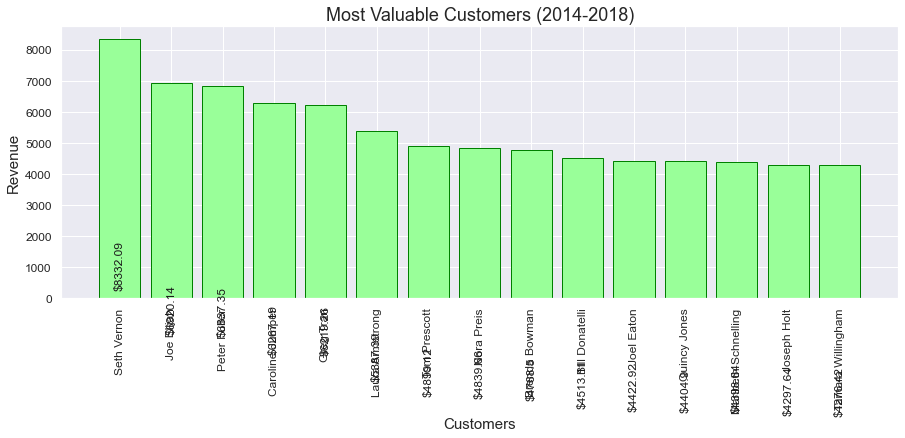

In [68]:
plt.figure(figsize = (15,5)) 
plt.title("Most Valuable Customers (2014-2018)", fontsize=18) 
plt.bar(Top_customers.index,Top_customers[('sum', 'Sales')].values,color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Customers",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers[('sum', 'Sales')].items(): 
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [28]:
sales_sum2 = pd.pivot_table(data,index=["State"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_state = sales_sum2.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_state = Top_state[[('sum', 'Sales')]].round(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

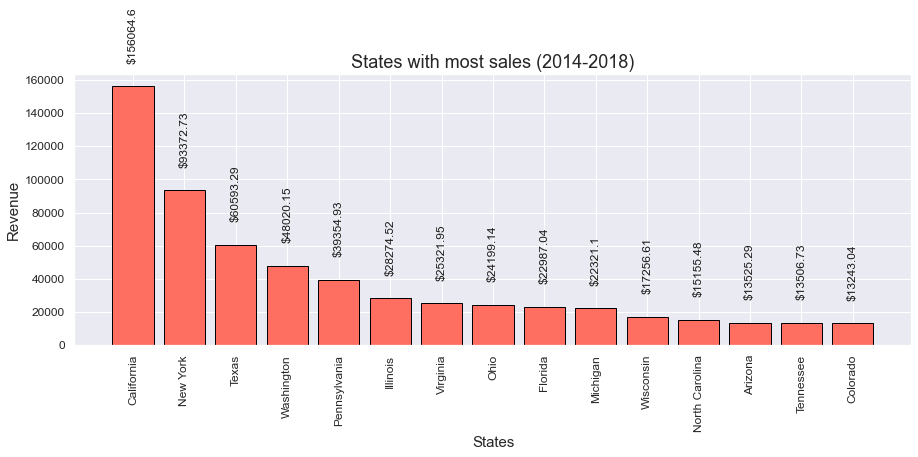

In [67]:

plt.figure(figsize = (15,5)) 
plt.title("States with most sales (2014-2018)", fontsize=18) 
plt.bar(Top_state.index,Top_state[('sum', 'Sales')].values,color= '#FF6F61',edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_state[('sum', 'Sales')].items():
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [30]:
sales_sum3 = pd.pivot_table(data,index=["City"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_city = sales_sum3.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_city = Top_city[[('sum', 'Sales')]].round(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

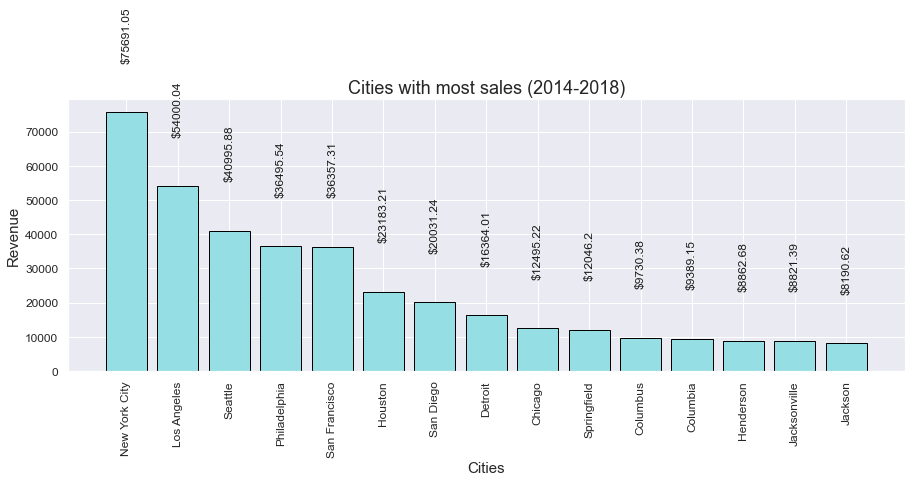

In [66]:

plt.figure(figsize = (15,5)) 
plt.title("Cities with most sales (2014-2018)", fontsize=18) 
plt.bar(Top_city.index,Top_city[('sum', 'Sales')].values,color= '#95DEE3',edgecolor='black', linewidth = 1)
plt.xlabel("Cities",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_city[('sum', 'Sales')].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

#### Time Series Visuals

In [32]:

def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)

    return(df)

In [33]:
data2 = data.copy() 
data2.drop('Row ID',axis = 1, inplace = True)

old_date_format='%m/%d/%Y'
new_date_format='%Y-%m-%d'

data2 = conv_dates_series(data2, "Order Date", old_date_format, new_date_format)

In [34]:
df = data2.sort_values(by = "Order Date")
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
631,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


<AxesSubplot:xlabel='Order Date'>

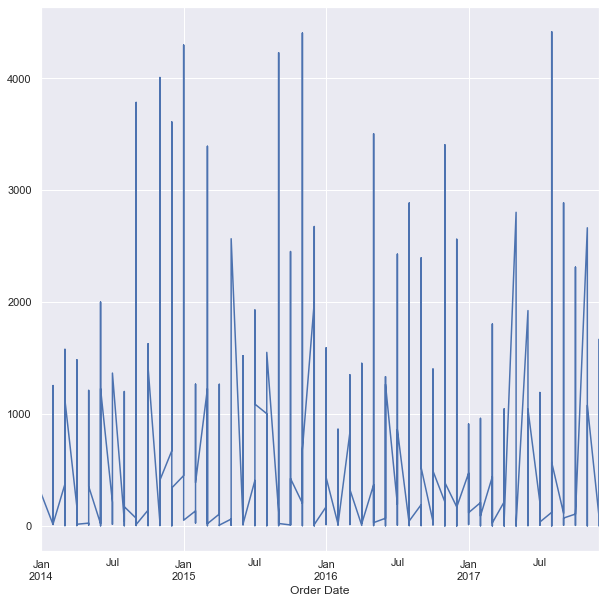

In [35]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

df.index = pd.PeriodIndex(df["Order Date"], freq='M')

df["Sales"].plot()

In [36]:
df['monthVal'] = pd.DatetimeIndex(df['Order Date']).month

df['Year'] = pd.DatetimeIndex(df['Order Date']).year

In [37]:
dataPivot = pd.pivot_table(df, values = "Sales",aggfunc='mean', columns = "Year", index = "monthVal")
dataPivot

Year,2014,2015,2016,2017
monthVal,,,,
1,312.126250,782.662773,346.488318,248.501333
2,262.808286,284.943091,206.607947,264.089900
3,441.635030,446.420821,312.221756,286.669600
4,305.570654,317.445409,377.488286,206.044502
5,288.032792,312.498350,351.624070,319.953928
6,440.204187,296.699192,343.962421,372.717386
7,327.910636,341.860500,335.090231,227.173500
8,305.014437,301.206006,430.456286,395.945487
9,425.294300,437.883717,328.468445,349.737422


<AxesSubplot:xlabel='monthVal'>

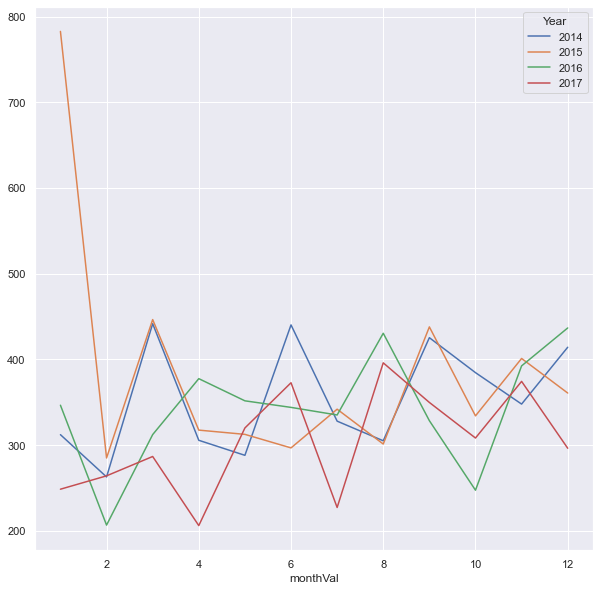

In [38]:
dataPivot.plot()

<IPython.core.display.Javascript object>

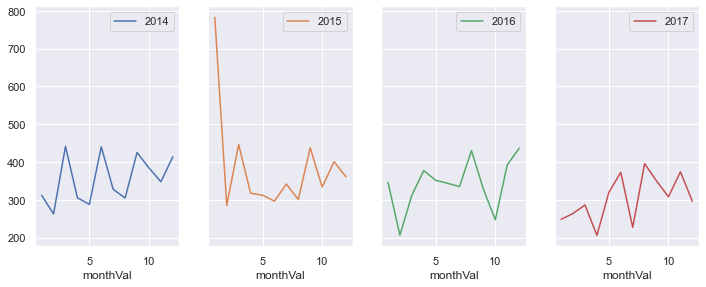

In [39]:
dataPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

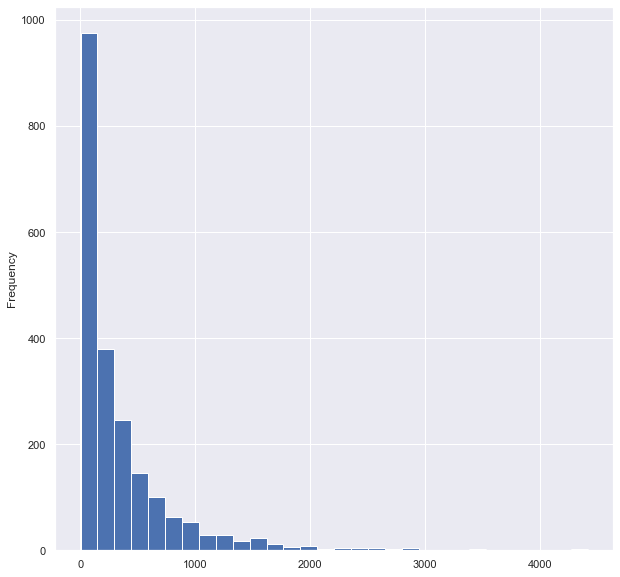

In [40]:
df["Sales"].plot(kind = "hist", bins = 30)

Transformation - Log

Transformations such as logarithms can help to stabilize the variance of a time series

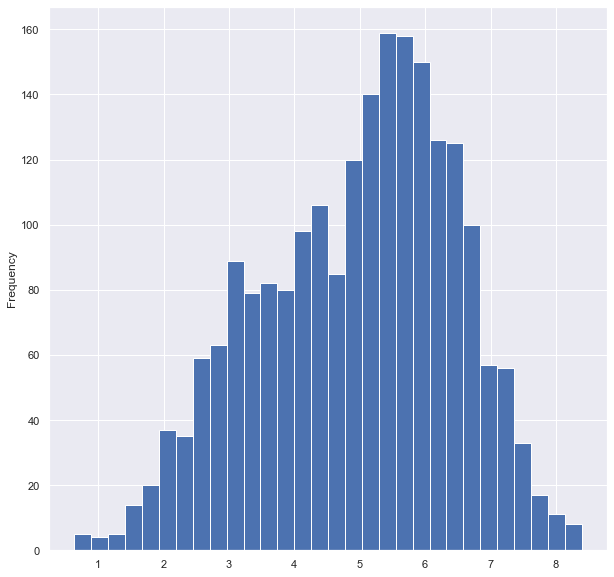

In [41]:
df['SalesLog'] = np.log(df["Sales"])
df.SalesLog.plot(kind = "hist", bins = 30)
sns.set(rc={'figure.figsize':(10,10)})

Linear Regression

Use a time Variable in prediction

In [42]:
df_1 = data.copy()
df_1['Order Date'] = pd.to_datetime(df_1['Order Date'], format='%m/%d/%Y')#sorting data by order date
df_1.sort_values(by=['Order Date'], inplace=True, ascending=True) 
df_1.set_index("Order Date", inplace = True)

In [43]:
df_1['time'] = df_1.index.to_series().apply(lambda x: x.toordinal())

# Splitting the data into 70:30
X_train, X_test = df_1[['time']][:int(df_1.shape[0]*0.7)], df_1[['time']][int(df_1.shape[0]*0.7):]
y_train, y_test = df_1['Sales'][:int(df_1.shape[0]*0.7)], df_1['Sales'][int(df_1.shape[0]*0.7):]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1484, 1), (1484,), (637, 1), (637,))

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_pred_train, squared=False))
lr_pred = lr.predict(X_test)

print('RMSE on test: ', mean_squared_error(y_test, lr_pred, squared=False))

RMSE on train:  519.2221174569854
RMSE on test:  462.2351601705749


In [45]:
def plot_predict(ts, x_test, y_pred):
    plt.figure(figsize=(6, 3))
    plt.plot(x_test.index, y_pred, label = 'Predicted values', linewidth=2)
    ts.plot(label = 'True values')
    plt.legend(loc = 'best', fontsize = 12)
    plt.xlabel('Order Date', fontsize = 12)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

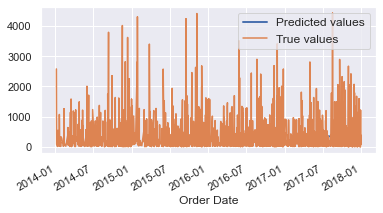

In [46]:
plot_predict(df_1['Sales'], X_test, lr_pred)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# check perfromance score
scores_lr = cross_val_score(LinearRegression(), 
                            X_train, y_train, 
                            cv=TimeSeriesSplit(n_splits=10),
                            scoring="neg_mean_squared_error")
np.mean(scores_lr)

-278010.30587186513

Polynomial regression

We can add polynomial term see if this will improve the performance or not

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(
    PolynomialFeatures(include_bias=False), 
    LinearRegression())
lr_poly.fit(X_train, y_train)
lr_poly_pred_train = lr_poly.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_pred_train, squared=False))

lr_poly_pred = lr_poly.predict(X_test)

print('RMSE on test: ', mean_squared_error(y_test, lr_poly_pred, squared=False))

RMSE on train:  519.2071940666161
RMSE on test:  461.85032490926307


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

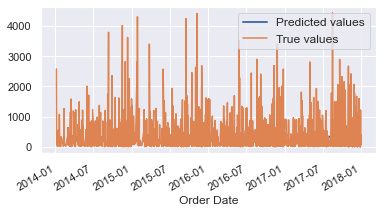

In [49]:
plot_predict(df_1['Sales'], X_test, lr_poly_pred)

In [50]:
scores_lr_poly = cross_val_score(lr_poly, 
                            X_train, y_train, 
                            cv=TimeSeriesSplit(n_splits=10),
                            scoring="neg_mean_squared_error")
np.mean(scores_lr_poly)


-279586.10274704074

Add a second variable in prediction

In [51]:
df_1['month_num'] = df_1.index.month
X_train, X_test = df_1[['time', 'month_num']][:int(df_1.shape[0]*0.7)], df_1[['time', 'month_num']][int(df_1.shape[0]*0.7):]

In [52]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1484, 2), (1484,), (637, 2), (637,))

RMSE on train:  518.4159609973792
RMSE on test:  462.8046711321442


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

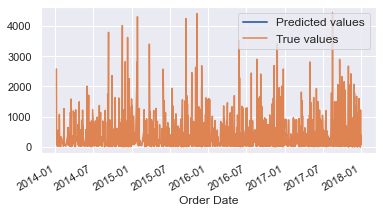

In [53]:
lr_poly.fit(X_train, y_train)
lr_poly_pred_train = lr_poly.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_pred_train, squared=False))
lr_poly_pred = lr_poly.predict(X_test)
print('RMSE on test: ', mean_squared_error(y_test, lr_poly_pred, squared=False))
plot_predict(df_1['Sales'], X_test, lr_poly_pred)

In [54]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x_transformer = ColumnTransformer(
    [("cat", OneHotEncoder(sparse=False), ['month_num'])],
    remainder='passthrough')

X_train_trans = x_transformer.fit_transform(X_train)

In [55]:
lr_poly_cat = make_pipeline(
    x_transformer,
    PolynomialFeatures(include_bias=False), 
    LinearRegression())
lr_poly_cat.fit(X_train, y_train)
lr_poly_cat_train = lr_poly_cat.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_cat_train, squared=False))
lr_poly_cat_pred = lr_poly_cat.predict(X_test)
print('RMSE on test: ', mean_squared_error(y_test, lr_poly_cat_pred, squared=False))

RMSE on train:  516.5015380915249
RMSE on test:  469.28584544765795


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

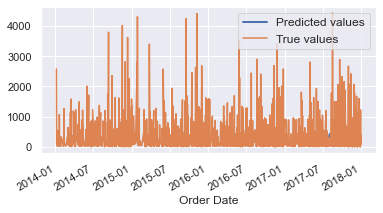

In [56]:
plot_predict(df_1['Sales'], X_test, lr_poly_cat_pred)


# Forecasting

In [58]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [59]:
data.drop('Row ID',axis = 1, inplace = True)
#sorting data by order date
data.sort_values(by=['Order Date'], inplace=True, ascending=True) 
data.set_index("Order Date", inplace = True)
data_new = pd.DataFrame(data['Sales'])
print(data_new.head())
data_new.tail()

               Sales
Order Date          
2014-01-06  2573.820
2014-01-07    76.728
2014-01-10    51.940
2014-01-11     9.940
2014-01-13   545.940


,Sales
Order Date,
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120
2017-12-29,300.980
2017-12-30,323.136


In [60]:
data_new =  pd.DataFrame(data_new['Sales'].resample('D').mean())
data_new = data_new.interpolate(method='linear') 
#It ignore the index and treats the values as equally spaced.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

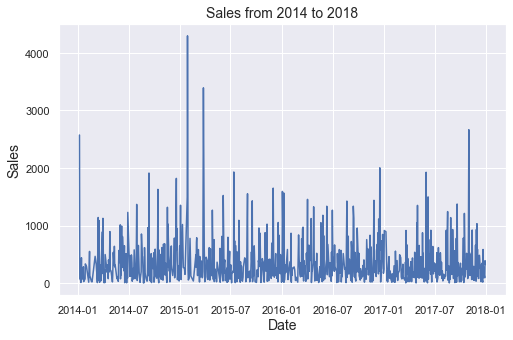

In [61]:
# Visualize the time series
plt.figure(figsize=(8, 5))

plt.plot(data_new.index, data_new.Sales)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.title('Sales from 2014 to 2018', fontsize = 14)
plt.show()


A series is said to be stationary when its mean and variance do not change over time. From the above distribution of the sales it is not clear whether the sales distribution is stationary or not. Let us perform some stationarity tests to check whether the time series is stationary or not.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

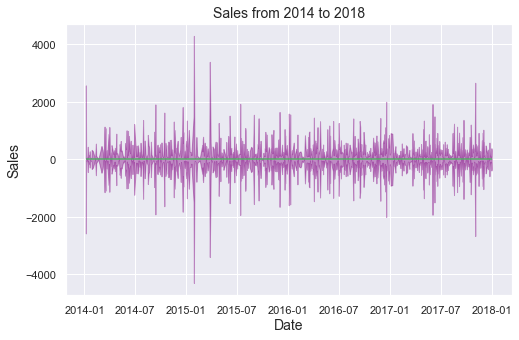

In [70]:
# Show this on both sides of the Y axis to emphasize the growth.
plt.figure(figsize=(8, 5))

plt.fill_between(data_new.index, data_new.Sales, -data_new.Sales, alpha = 0.4, color = 'purple')
plt.hlines(0, np.min(data_new.index), np.max(data_new.index), color = 'g')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.title('Sales from 2014 to 2018', fontsize = 14)
plt.show()

Decomposing the time series

Additive time series: Value = Level + Trend + Seasonality + Noise

Multiplicative Time Series: Value = Level x Trend x Seasonality x Noise

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(data_new['Sales'], model='additive', extrapolate_trend='freq')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_new['Sales'], model='multiplicative', extrapolate_trend='freq')

<IPython.core.display.Javascript object>

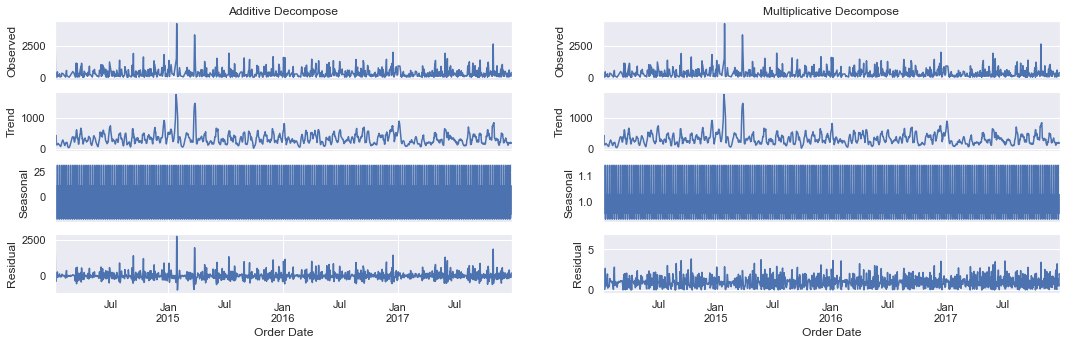

In [72]:
def plotseasonal(res, axes, suptitle):
    res.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed', fontsize=12)
    axes[0].set_title(suptitle, fontsize=12)
    res.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend', fontsize=12)
    res.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal', fontsize=12)
    res.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual', fontsize=12)
    
    
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(18,5))

plotseasonal(result_add, axes[:,0], 'Additive Decompose')
plotseasonal(result_mul, axes[:,1], 'Multiplicative Decompose')

Check Stationarity for the Time Series

In [73]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(ts, do_adf=True, do_kpss = False):
    
    # Determing rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(8, 5))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', fontsize=12)
    plt.title('Rolling Mean & Standard Deviation', fontsize=12)
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Sales', fontsize = 12)
    plt.show(block=False)
    
    if do_adf:
        # Perform Augmented Dickey-Fuller test:
        print('Results of ADF Test:')
        dftest = adfuller(ts, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
    
    print() 
    
    if do_kpss:
        # Perform Kwiatkowski-Phillips-Schmidt-Shin test:
        print('Results of KPSS Test:')
        dftest = kpss(ts, regression='c')
        dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Truncated Lag #'])
        for key,value in dftest[3].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

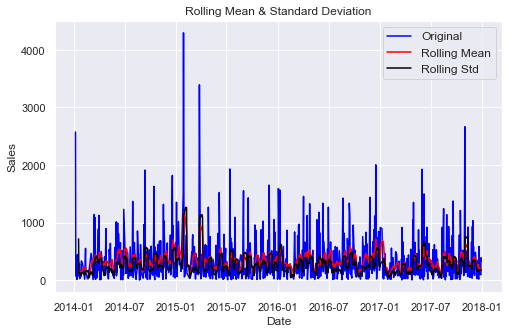

Results of ADF Test:
Test Statistic                  -24.598259
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1454.000000
Critical Value (1%)              -3.434855
Critical Value (5%)              -2.863530
Critical Value (10%)             -2.567829
dtype: float64

Results of KPSS Test:
Test Statistic            0.129648
p-value                   0.100000
Truncated Lag #          24.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [74]:
test_stationarity(data_new.Sales, do_kpss = True)

The test statistic is smaller than the 0.1% critical values so we can say with 99.9% confidence that this is a stationary series.

Forecasting Time Series

ARIMA Mode

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

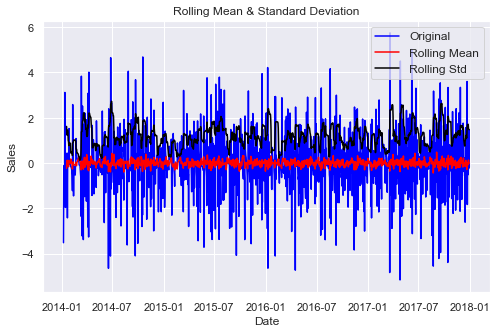

Results of ADF Test:
Test Statistic                -1.444188e+01
p-value                        7.336395e-27
#Lags Used                     2.300000e+01
Number of Observations Used    1.430000e+03
Critical Value (1%)           -3.434931e+00
Critical Value (5%)           -2.863563e+00
Critical Value (10%)          -2.567847e+00
dtype: float64



In [75]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

# Splitting the data into 70:30
train = data_new[:int(data_new.shape[0]*0.7)]
test = data_new[int(data_new.shape[0]*0.7):]

ts_log = np.log(data_new.Sales)
ts_log_diff = ts_log.diff()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [76]:
train.head()

,Sales
Order Date,
2014-01-06,2573.820000
2014-01-07,76.728000
2014-01-08,68.465333
2014-01-09,60.202667
2014-01-10,51.940000


In [80]:
!pip install pmdarima

In [81]:
# Estimate ARIMA differencing term
# If the time series is constant, will return 0.
from pmdarima.arima.utils import ndiffs
y = ts_log

# ADF Test
print('Estimate differencing term from ADF: ', ndiffs(y, test='adf') )

# KPSS test
print('Estimate differencing term from KPSS: ', ndiffs(y, test='kpss') )

# PP test:
print('Estimate differencing term from PP: ', ndiffs(y, test='pp'))

Estimate differencing term from ADF:  0
Estimate differencing term from KPSS:  0
Estimate differencing term from PP:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

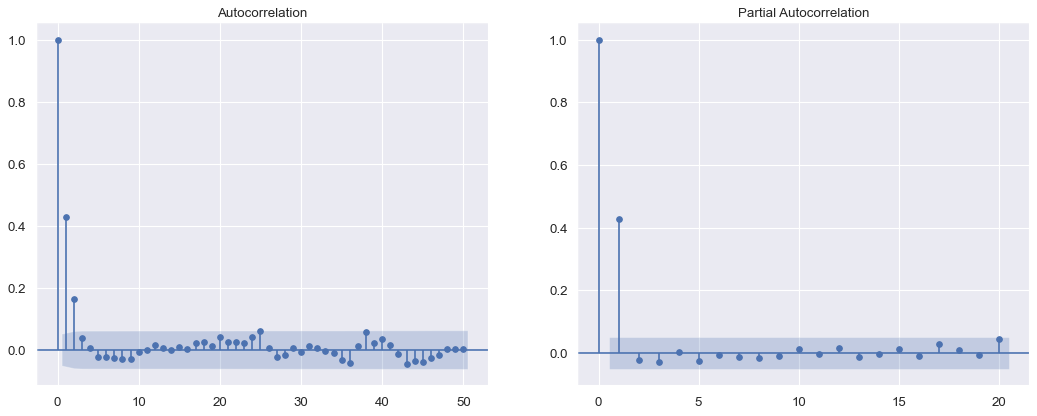

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(data_new.Sales.tolist(), ax=ax1, lags=50)
plot_pacf(data_new.Sales.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

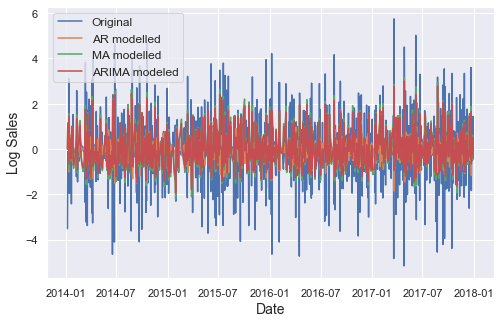

AR modelled RSS: 2037.3089
MA modelled RSS: 1578.2081
ARIMA modelled RSS: 1551.1980


In [83]:
from statsmodels.tsa.arima_model import ARIMA

## AR model: p = 1, d = 1, q = 0
model_AR = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model_AR.fit(disp = -1)  

## MA model: p = 0, d = 1, q = 2
model_MA = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model_MA.fit(disp = -1)  

## ARIMA model: p = 1, d = 1, q = 2
model_ARIMA = ARIMA(ts_log, order=(1, 1, 2))  
results_ARIMA = model_ARIMA.fit(disp = -1)


plt.figure(figsize = (8, 5))
plt.plot(ts_log_diff, label = 'Original')
plt.plot(results_AR.fittedvalues, label = 'AR modelled')
plt.plot(results_MA.fittedvalues, label = 'MA modelled')
plt.plot(results_ARIMA.fittedvalues, label = 'ARIMA modeled')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Log Sales', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()


print('AR modelled RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
print('MA modelled RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
print('ARIMA modelled RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

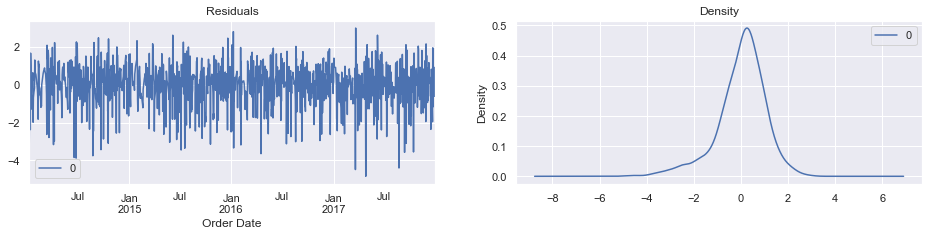

In [84]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1, 2, figsize = (16, 3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

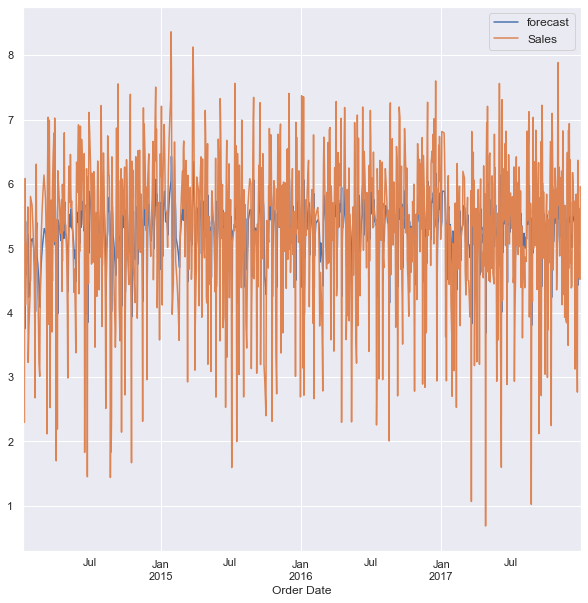

In [85]:
results_ARIMA.plot_predict(dynamic=False)
plt.legend(fontsize=12)
plt.show()

In [93]:
from statsmodels.tsa.stattools import acf

# Training and test split, approx 70%, 30%
'''
NOT sampling here, because the order sequence of the time series 
should be intact in order to use it for forecasting
'''

train = ts_log[:int(data_new.shape[0]*0.7)]
test = ts_log[int(data_new.shape[0]*0.7):]

# Build Model
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  

# Forecast, 95% confidence interval
fc, _, conf = fitted.forecast(437, alpha=0.05) 

# Make as pandas series for plotting
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


C:\Users\pawan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [94]:
train.head()

Order Date
2014-01-06    7.853146
2014-01-07    4.340267
2014-01-08    4.226328
2014-01-09    4.097717
2014-01-10    3.950089
Freq: D, Name: Sales, dtype: float64

In [96]:
arima_train = fitted.predict(end = len(train), dynamic=False)
print('RMSE on train: ', mean_squared_error(train, arima_train, squared=False))
#arima_test = fitted.predict(start=pd.to_datetime('2016-10-19'), end = pd.to_datetime('2017-12-30'), dynamic=False)
#print('RMSE on test: ', mean_squared_error(test, arima_test, squared=False))


RMSE on train:  5.650947166788049


In [97]:
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                 1017
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1457.972
Method:                       css-mle   S.D. of innovations              1.012
Date:                Thu, 07 Oct 2021   AIC                           2925.945
Time:                        12:27:51   BIC                           2950.568
Sample:                    01-07-2014   HQIC                          2935.295
                         - 10-19-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.914      0.361      -0.000       0.001
ar.L1.D.Sales     0.3708      0.067      5.536      0.000       0.240       0.502
ma.L1.D.Sales    -0.9603      0.071    -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

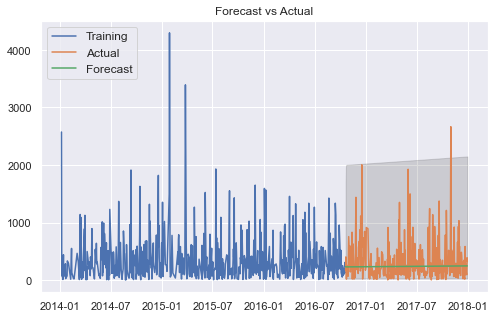

In [98]:

# Plot
plt.figure(figsize=(8,5))
plt.plot(np.exp(train), label='Training')
plt.plot(np.exp(test), label='Actual')
plt.plot(np.exp(fc_series), label='Forecast')
plt.fill_between(lower_series.index, np.exp(lower_series), np.exp(upper_series), 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual', fontsize = 12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [99]:
sales = pd.DataFrame(data_new.Sales).reset_index()

# rename columns to fit Prophet
sales.columns = ['ds', 'y']
sales.shape[0]


1455

In [116]:

X_tr = sales[:int(sales.shape[0]*0.7)]
X_tst = sales[int(sales.shape[0]*0.7):]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

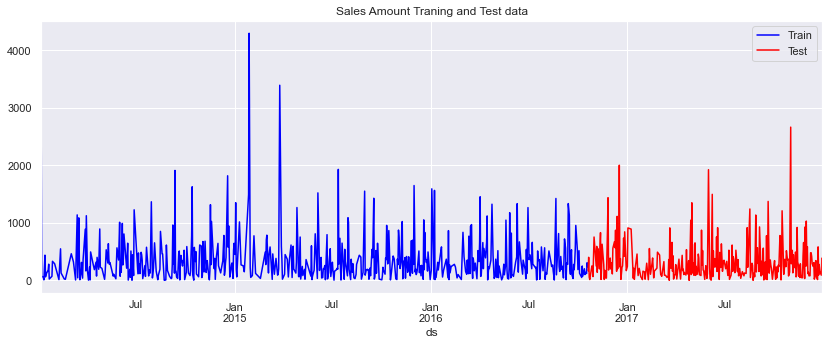

In [109]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [119]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150
